$$u_t + \left[f(u)\right]_x = 0$$

$$w(x, t) = \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} u(s, t) \, ds$$

$$\begin{align*}
w_t &= \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} u_t \, ds \\
&= \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} -\left[f(u)\right]_s \, ds \\
&= -\frac{f\left(u\left(x + \Delta x / 2, t\right)\right) - f\left(u\left(x - \Delta x / 2, t\right)\right)}{\Delta x}
\end{align*}$$

$$\begin{align*}
u_j^n &= u\left(j \Delta x, n \Delta t\right) \\
w_j^n &= w\left(j \Delta x, n \Delta t\right)
\end{align*}$$

$$\frac{d}{dt} w_j^n = -\frac{1}{\Delta x}\left(f\left(u_{j + \frac{1}{2}}\right) - f\left(u_{j - \frac{1}{2}}\right)\right)$$

$$\left\{w_j^n\right\}_j \overset{?}{\longrightarrow} \left\{u_{j + 1/2}^n\right\}_j$$

> WENO interpolation ... [is] used ... to transfer information from one domain to another in a high order, nonoscillatory fashion

![WENO Transfer Quote](weno_transfer_quote.jpg "WENO Paper Quote")

In [1]:
%matplotlib inline

from IPython import display
import seaborn
import sympy

import weno_computations

seaborn.set_palette('husl')

On an evenly spaced grid $x_j = j \Delta x$, $u(x_{j}) = u_{j}$.

**GOAL**: Approximate $u\left(x_{j + \frac{1}{2}}\right)$ (third and fifth order, using $x_{j-2}, x_{j-1}, x_j, x_{j+1}, x_{j+2}$).

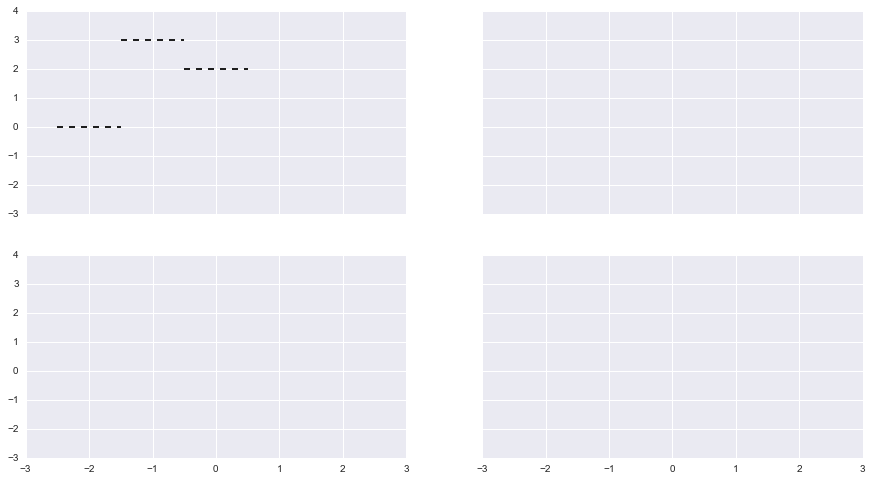

In [2]:
weno_computations.make_intro_plots(0)

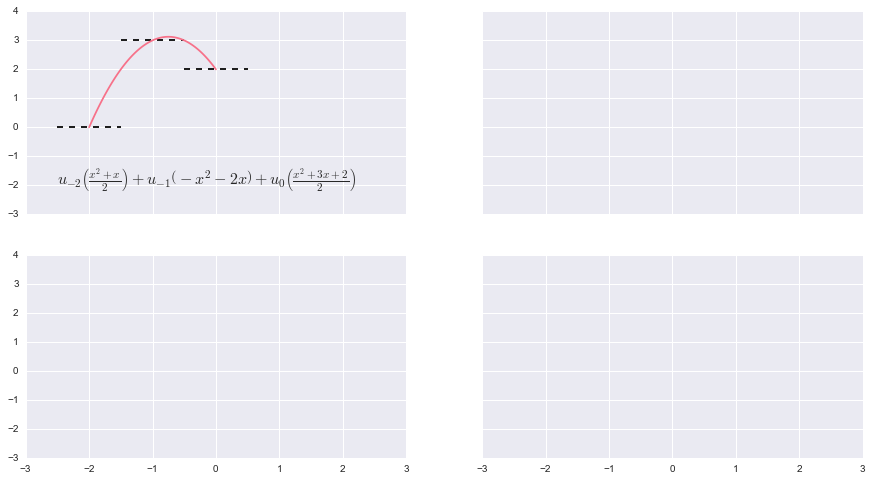

In [3]:
weno_computations.make_intro_plots(1)

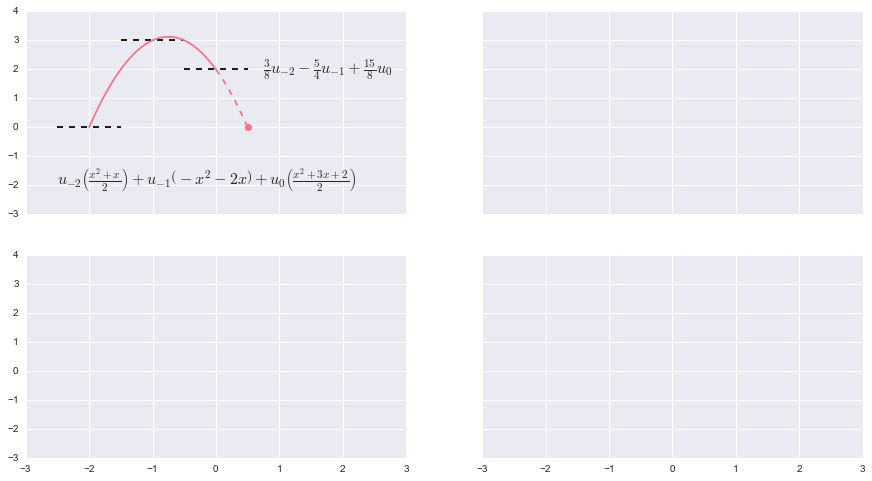

In [4]:
weno_computations.make_intro_plots(2)

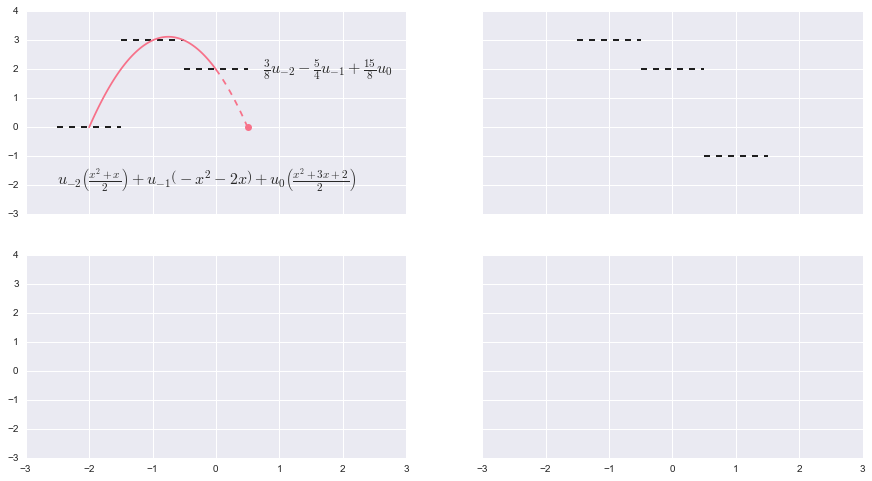

In [5]:
weno_computations.make_intro_plots(3)

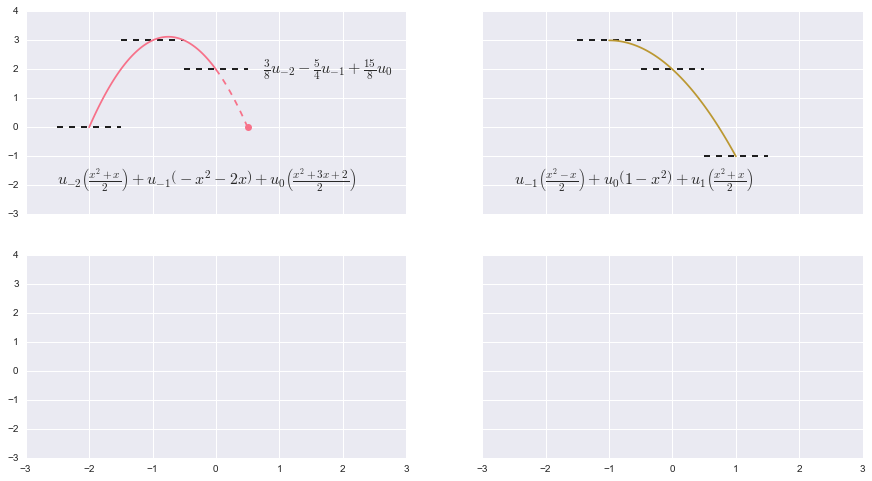

In [6]:
weno_computations.make_intro_plots(4)

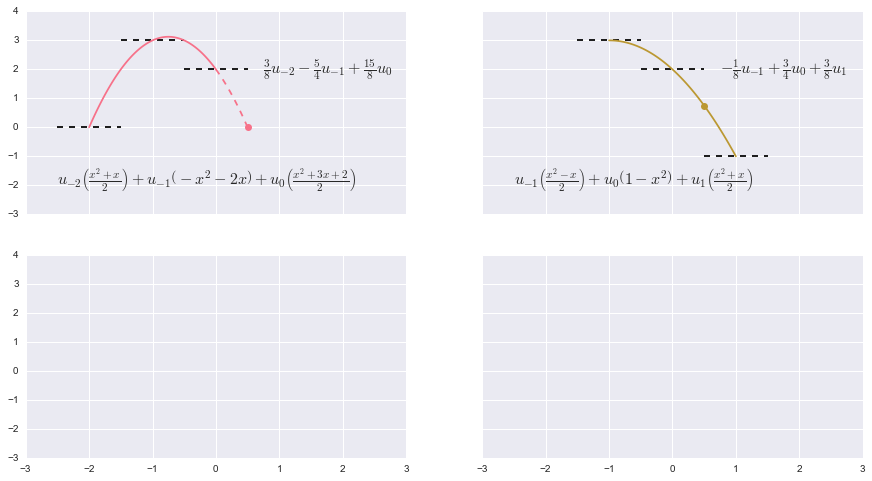

In [7]:
weno_computations.make_intro_plots(5)

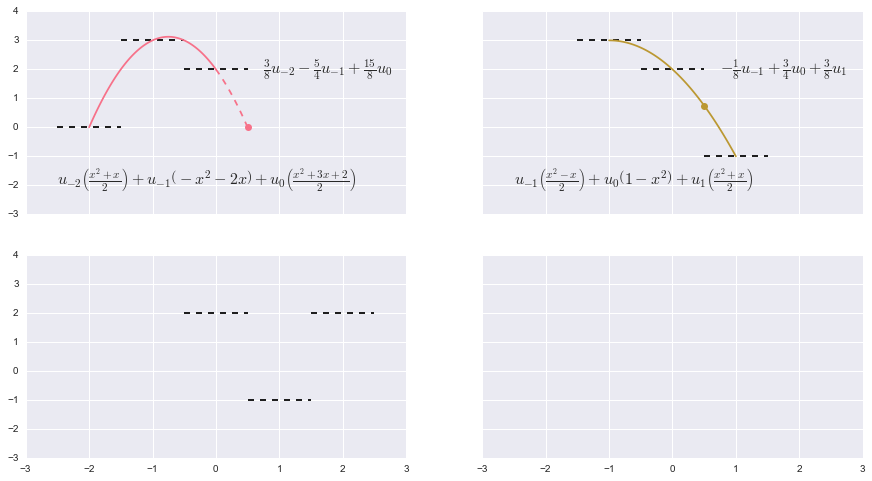

In [8]:
weno_computations.make_intro_plots(6)

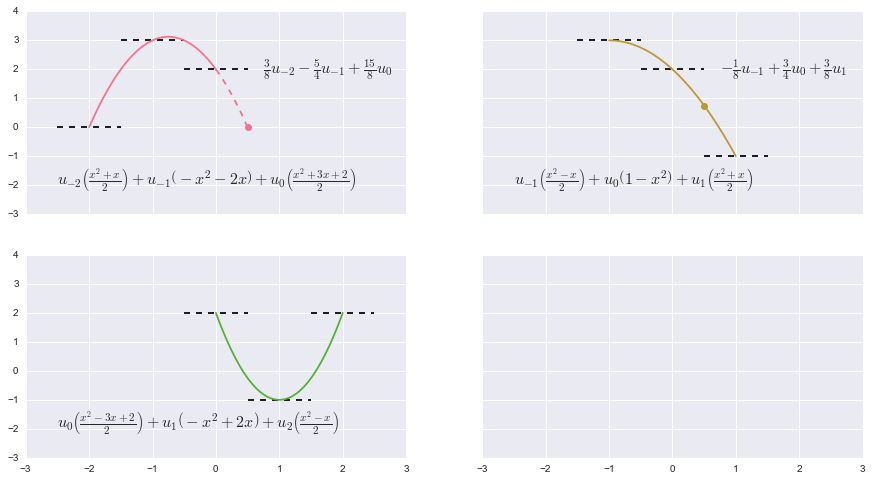

In [9]:
weno_computations.make_intro_plots(7)

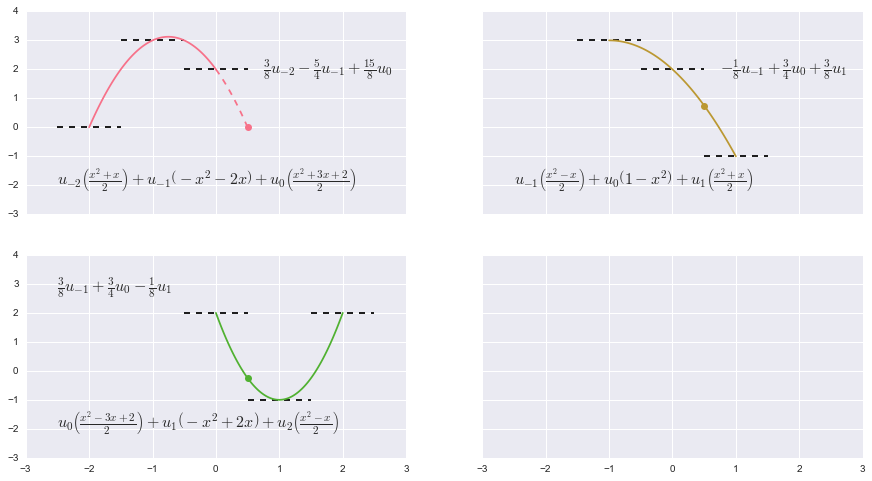

In [10]:
weno_computations.make_intro_plots(8)

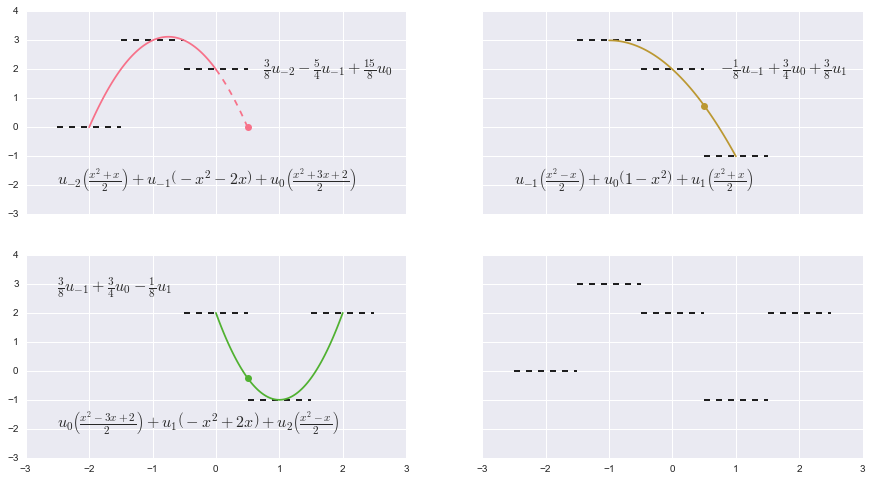

In [11]:
weno_computations.make_intro_plots(9)

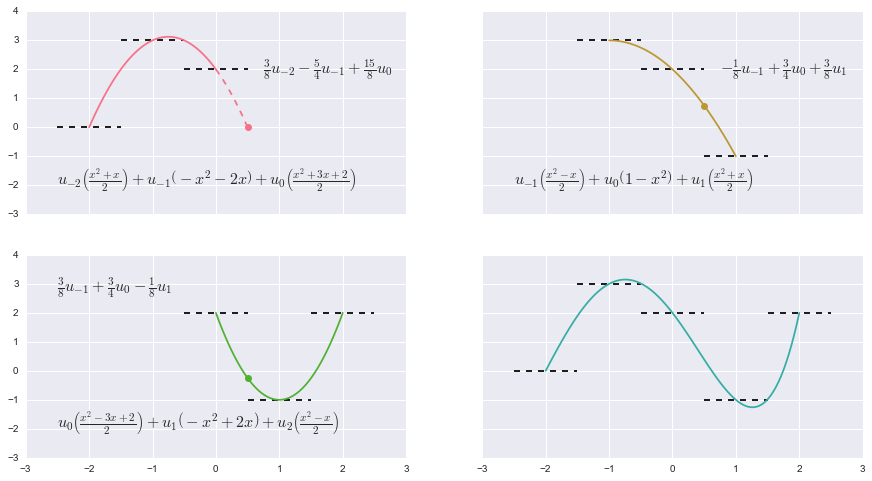

In [12]:
weno_computations.make_intro_plots(10)

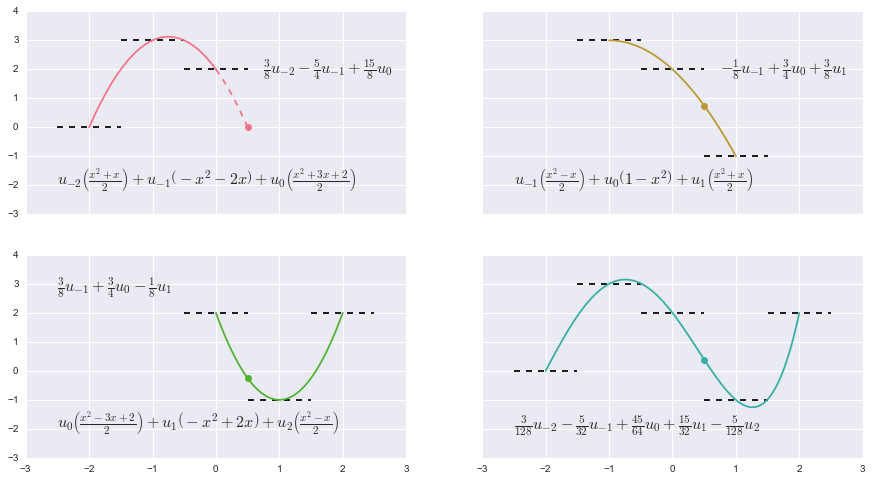

In [13]:
weno_computations.make_intro_plots(11)

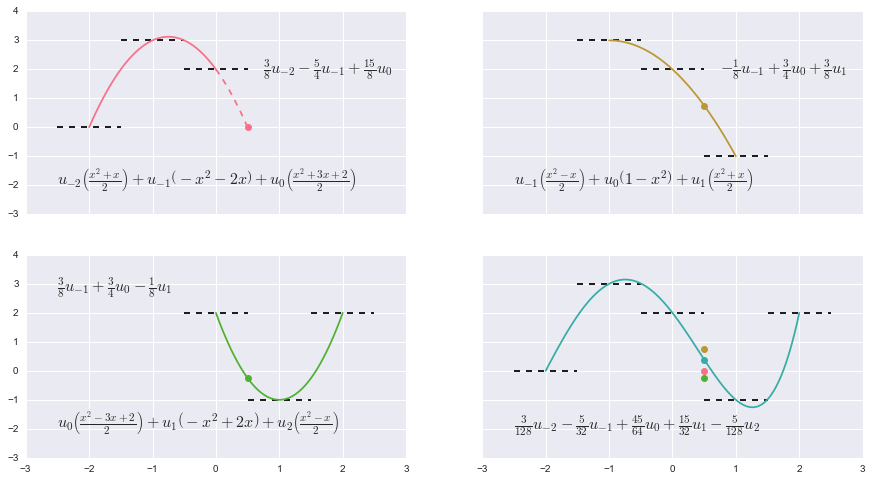

In [14]:
weno_computations.make_intro_plots(12)

In [15]:
# The slide below can be produced with the following:
(approx_minus2, approx_minus1, 
 approx_zero, approx_all) = weno_computations.interp_simple_stencils()

approx_minus2 = approx_minus2.replace('=', '&=')
approx_minus1 = approx_minus1.replace('=', '&=')
approx_zero = approx_zero.replace('=', '&=')
approx_all = approx_all.replace('=', '&=')

all_math = r"""\begin{align*}
%s \\ %s \\ %s \\ %s \end{align*}
""" % (approx_minus2, approx_minus1, approx_zero, approx_all)

\begin{align*}
u^{{(1)}}_{{j + \frac{1}{2}}} &= \frac{3 u_{j-2}}{8} - \frac{5 u_{j-1}}{4} + \frac{15 u_{j}}{8} \\
u^{{(2)}}_{{j + \frac{1}{2}}} &= - \frac{u_{j-1}}{8} + \frac{3 u_{j}}{4} + \frac{3 u_{j+1}}{8} \\
u^{{(3)}}_{{j + \frac{1}{2}}} &= \frac{3 u_{j}}{8} + \frac{3 u_{j+1}}{4} - \frac{u_{j+2}}{8} \\
u_{{j + \frac{1}{2}}} &= \frac{3 u_{j-2}}{128} - \frac{5 u_{j-1}}{32} + \frac{45 u_{j}}{64} + \frac{15 u_{j+1}}{32} - \frac{5 u_{j+2}}{128}
\end{align*}

The TVD-diminishing RK scheme

$$\begin{array}{c | c c c}
  0 &     &     &   \\
  1 &   1 &     &   \\
1/2 & 1/4 & 1/4 &   \\
\hline
    & 1/6 & 1/6 & 2/3
\end{array}$$

when applied to a linear problem $u' = \lambda u$ gives
$$\begin{align*}
k_1 &= \lambda u \\
k_2 &= \lambda \left(u + \Delta t k_1\right) = \left(\lambda + \lambda^2 \Delta t\right) u \\
k_3 &= \lambda \left(u + \frac{\Delta t}{4} k_1 + \frac{\Delta t}{4} k_2\right) =
\left(\lambda + \frac{\lambda^2 \Delta t}{2} + \frac{\lambda^3 (\Delta t)^2}{4}\right)u \\
u^{\text{new}} &= u + \frac{\Delta t}{6}\left(k_1 + k_2 + 4 k_3\right) =
\left(1 + z + \frac{z}{2} + \frac{z^3}{6}\right)u
\end{align*}$$